# Szenario: Vergleich verschiedener Implementierungen des gleichen Schwellenwert-Algorithmus
In diesem Notebook werden wir verschiedene Implementierungen des gleichen Algorithmus vergleichen. Als Beispiel wählen wir Otsus Methode für binäre Schwellenwertbildung in Kombination mit [Connected Component Labeling](https://en.wikipedia.org/wiki/Connected-component_labeling). Der Algorithmus wurde vor über 40 Jahren veröffentlicht und man könnte annehmen, dass alle gängigen Implementierungen dieses Algorithmus identische Ergebnisse zeigen.

## Siehe auch
* [A Threshold Selection Method from Gray-Level Histograms (N. Otsu 1979)](https://ieeexplore.ieee.org/document/4310076)

In [1]:
from skimage.io import imread, imshow, imsave
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

## Implementierung 1: ImageJ

Als erste Implementierung betrachten wir [ImageJ](https://imagej.nih.gov/ij/index.html). Wir werden es als Teil der [Fiji-Distribution](https://fiji.sc/) verwenden. Der folgende [ImageJ Macro](https://imagej.nih.gov/ij/developer/macro/macros.html)-Code öffnet "blobs.tif", wendet Otsus Methode zur Schwellenwertbildung an und führt Connected Component Labeling durch. Das resultierende Labelbild wird auf der Festplatte gespeichert. Sie können dieses Skript in Fijis Skript-Editor ausführen, indem Sie auf `Datei > Neu > Skript` klicken.

**Hinweis:** Bei der Ausführung dieses Skripts sollten Sie den Pfad der Bilddaten so anpassen, dass es auf Ihrem Computer funktioniert.

In [2]:
with open('blobs_segmentation_imagej.ijm') as f:
    print(f.read())

open("C:/structure/code/clesperanto_SIMposium/blobs.tif");

// binarization
setAutoThreshold("Otsu dark");
setOption("BlackBackground", true);
run("Convert to Mask");

// Connected component labeling + measurement
run("Analyze Particles...", "  show=[Count Masks] ");

// Result visualization
run("glasbey on dark");

// Save results
saveAs("Tiff", "C:/structure/code/clesperanto_SIMposium/blobs_labels_imagej.tif");



Das Ergebnis sieht dann so aus:

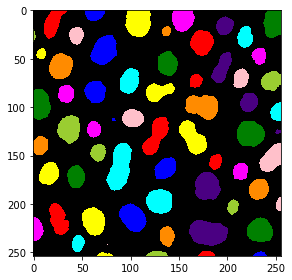

In [3]:
imagej_label_image = imread("blobs_labels_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)

## Implementierung 2: scikit-image
Als zweite Implementierung verwenden wir [scikit-image](https://scikit-image.org/). Da es in Jupyter-Notebooks verwendet werden kann, können wir den Workflow auch genauer betrachten.

Wir beginnen mit dem Laden und Visualisieren des ursprünglichen Blobs-Bildes.

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


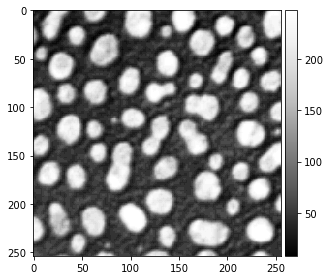

In [4]:
blobs_image = imread("blobs.tif")
imshow(blobs_image, cmap="Greys_r")

Die [`threshold_otsu` Methode](https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=threshold%20otsu#skimage.filters.threshold_otsu) wird dann verwendet, um das Bild zu binarisieren.

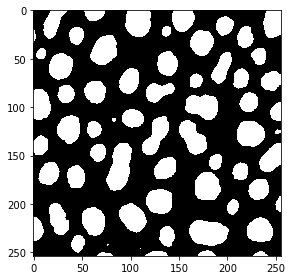

In [5]:
# Schwellenwert bestimmen
threshold = threshold_otsu(blobs_image)

# Schwellenwert anwenden
binary_image = blobs_image > threshold

imshow(binary_image)

Für das Connected Component Labeling verwenden wir die [`label` Methode](https://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label). Die Visualisierung des Labelbildes wird mit der [`label2rgb` Methode](https://scikit-image.org/docs/dev/api/skimage.color.html?highlight=label2rgb#skimage.color.label2rgb) erzeugt.

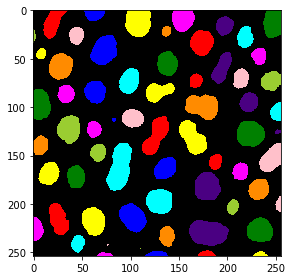

In [6]:
# Connected Component Labeling
skimage_label_image = label(binary_image)

# In Farben visualisieren
visualization = label2rgb(skimage_label_image, bg_label=0)
imshow(visualization)

Um die Bilder später zu vergleichen, speichern wir dieses auch auf der Festplatte.

In [7]:
imsave("blobs_labels_skimage.tif", skimage_label_image)

C:\Users\rober\AppData\Local\Temp\ipykernel_6744\179771585.py:1: UserWarning: blobs_labels_skimage.tif is a low contrast image
  imsave("blobs_labels_skimage.tif", skimage_label_image)


## Implementierung 3: clesperanto / python
Die dritte Implementierung des gleichen Workflows läuft ebenfalls in Python und verwendet [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype).

**Hinweis:** Bei der Ausführung dieses Skripts sollten Sie den Pfad der Bilddaten so anpassen, dass es auf Ihrem Computer funktioniert.

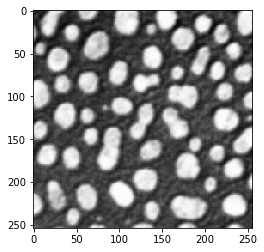

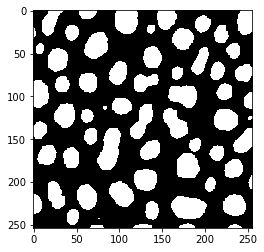

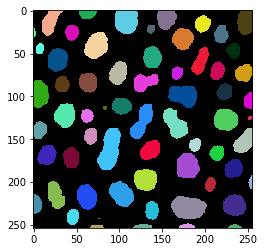

In [8]:
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

Wir werden auch dieses Bild für den späteren Vergleich speichern.

In [9]:
imsave("blobs_labels_clesperanto_python.tif", label_image)

## Implementierung 4: clesperanto / Jython

Die vierte Implementierung verwendet clesperanto innerhalb von Fiji. Um dieses Skript in Fiji auszuführen, aktivieren Sie bitte die clij, [clij2](https://clij.github.io/) und [clijx-assistant](https://clij.github.io/clijx-assistant/) Update-Sites in Ihrem Fiji. Sie werden bemerken, dass dieses Skript mit dem obigen identisch ist. Nur das Speichern des Ergebnisses funktioniert anders.

**Hinweis:** Bei der Ausführung dieses Skripts sollten Sie den Pfad der Bilddaten so anpassen, dass es auf Ihrem Computer funktioniert.

In [10]:
with open('blobs_segmentation_clesperanto.py') as f:
    print(f.read())

# To make this script run in Fiji, please activate the clij, clij2
# and clijx-assistant update sites in your Fiji. 
# Read more: 
# https://clij.github.io/
# 
# To make this script run in python, install pyclesperanto_prototype:
# conda install -c conda-forge pyopencl
# pip install pyclesperanto_prototype
# Read more: 
# https://clesperanto.net
# 
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

# The followin

Wir werden uns auch das Ergebnis dieses Workflows ansehen:

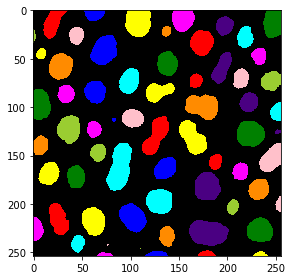

In [11]:
imagej_label_image = imread("blobs_labels_clesperanto_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)